# Árboles de decisión / Aprendizaje en conjunto (ensamble learning)

Los árboles de decisión (decision trees), sus derivaciones: *random forest* y el múltiple ganador de competiciones ([Kaggle](https://www.kaggle.com/)) *Gradient boosted tree* , se verán durante esta clase. Los árboles de decisión son simples, fáciles de interpretar y pueden dar muy buenos resultados cuando se juntan (bagged) y se aumentan (boosted).

## Árboles de decisión de regresión

Pueden aplicarse tanto a la regresión como a la clasificación. Los árboles de decisión son gráficos en los que se puede comenzar desde la "raíz" y se recorre el camino hacia abajo tomando decisiones en las "ramas" antes de terminar finalmente en una "hoja" que da la predicción.

<img src="images/Clases_T9_T10_ARBOLES.png" alt="Drawing" style="width: 500px;"/>

Dos pasos generales para construir un árbol de decisión (regresión) son:

1. Dividir el espacio del predictor en un númmero $j$ de regiones.
2. Para cada región, se encuentra la respuesta media y se usa como el valor predicho. Esto minimizará el error cuadrado para esa región.

Las regiones en teoría se pueden dividir de cualquier manera que se elija, pero en la práctica, se dividen en rectángulos de gran dimensión (ver la Figura). Por ejemplo, se podría haber usado una línea con una pendiente distinta de cero para dividir la región de abajo para obtener un ajuste más preciso, pero la simplicidad gana aquí y simplementese se dividen n líneas horizontales y verticales o "rectángulos de alta dimensión".

<img src="images/Clases_T9_T10_Region.png" alt="Drawing" style="width: 500px;"/>

## ¿Cómo se obtienen las ramas?

Se podría tratar de construir todos los árboles imaginables y encontrar el árbol con el error cuadrado más bajo, pero esto es computacionalmente inviable, incluso para un número relativamente pequeño de predictores. En cambio, se usa un enfoque ambicioso al construir el árbol una rama a la vez. La primera rama se construye probando diferentes divisiones binarias de los datos.

Por ejemplo, $ X_1 <5 $ y $ X_1> = 5 $ serían una división potencial. $ X_2 = YES $ y $ X_2 = NO $ podría ser otra división binaria. El error cuadrado más bajo se considera para la mejor división y esa división se elige para la primera rama. Este proceso continúa ahora para cada rama, de manera interactiva, hasta que se cumplan algunos criterios de detención (número máximo de ramas, número mínimo de observaciones en una determinada rama, etc.).

### El algoritmo de entrenamiento CART 

Scikit-Learn utiliza el algoritmo CART (classification and regression trees) para entrenar Árboles de Decisión (también llamados árboles "en crecimiento"). La idea es bastante simple: el algoritmo primero divide el conjunto de entrenamiento en dos subconjuntos usando una única característica $k$ y un umbral $t_k$ (por ejemplo, "Years < 4,5"). ¿Cómo elige $k$ y $t_k$? Busca el par ($k$, $t_k$) que produce los subconjuntos más puros (ponderados por su tamaño). La función de costo que el algoritmo intenta minimizar viene dada por:

<img src="images/CART_eq_reg.png" alt="Drawing" style="width: 500px;"/>


Donde $m_{left}, m_{right}$ es el número de instancias en el subcojunto de la izquierda/derecha del árbol.

Una vez que el conjunto de entrenamiento se ha dividido con éxito en dos, se divide los subconjuntos usando la misma lógica, luego los subconjuntos secundarios y así sucesivamente, de forma recursiva. El algoritmo deja de actuar recursivamente, una vez que alcanza la profundidad máxima (definida por el hiperparámetro max_depth), o si no puede encontrar una división que reduzca la impureza. Otros **hiperparámetros** que controlan algunas condiciones adicionales de detención son: *min_samples_split, min_samples_leaf, min_weight_fraction_leaf, y max_leaf_nodes.*

## Árboles de decisión de clasificación

El árbol de clasificación es similar al de la regresión pero ahora se trata de predecir una *variable cualitativa*: la clase a la que pertenece un objeto. Ahora el objetivo es que cada región quede definida por la *clase que ocurra con mayor frecuencia* para las observaciones del conjunto de training en la región en cuestión.

Para construir el árbol, se usa también la *división binaria recursiva* y *el algoritmo CART*, pero no puede usarse el criterio RSS para hacer las particiones.

Una alternativa natural es la proporción de errores de clasificación, es decir, la proporción de observaciones del conjunto de training en la región obtenida en el nodo m que no pertenecen a la clase más frecuente.

<img src="images/Clases_T9_T10_ArbolesClass.png" style="float: left; width: 48%; margin-right: 0%; margin-bottom: 0.5em;">
<img src="images/Clases_T9_T10_construccion_Gini.png" style="float: right; width: 48%; margin-right: 2%; margin-bottom: 0.5em;">
<p style="clear: both;">

El proceso anterior se va repitiendo recursivamente, separando los subconjuntos usando la misma idea, hasta que se alcanza un criterio de parada o no puede encontrarse una división que reduzca el índice de impureza.

El algoritmo deja de actuar recursivamente, una vez que alcanza la profundidad máxima (definida por el hiperparámetro max_depth), o si no puede encontrar una división que reduzca la impureza. Otros **hiperparámetros** que controlan algunas condiciones adicionales de detención son: *min_samples_split, min_samples_leaf, min_weight_fraction_leaf, y max_leaf_nodes.*

### Ventajas de los árboles de decisión
* Los árboles son muy fáciles de explicar. Siguen una lógica cercana a la forma humana de razonar. 

* Son fáciles de interpretar especialmente si son pequeños. Admiten una visualización gráfica intuitiva. 

* Son modelos del tipo “caja blanca”. Puede seguirse fácilmente la influencia de los distintos descriptores en el proceso de predicción. 

* Conviven fácilmente predictores cuantitativos y cualitativos sin necesidad de introducir variables ficticias (dummy). 

### Desventajas de los árboles de decisión
* El entrenamiento (creación del árbol) es computacionalmente costoso puesto que, en cada nodo, el proceso de división requiere comparar todos los descriptores. Esto es especialmente notable cuando el número de descriptores y/o el de observaciones son grandes.

* No obstante, la realización de predicciones es rápida porque atravesar cada nodo implica un solo descriptor. 

* Los árboles necesitan muy pocas hipótesis sobre los datos y no tienen parámetros. Si no se imponen restricciones, la estructura se adapta a los datos del conjunto de entrenamiento. Esto puede implicar “overfitting”. 

### Reducción de la complejidad (regularización)

Para evitar el overfitting con el conjunto de training, suelen introducirse *restricciones* en la construcción del árbol de decisión, es decir alguna forma de *regularización* asociada a **hiperparámetros**.

Particularmente, la clase `sklearn.tree.DecisionTreeClassifier` tiene algunos hiperparámetros que restringen la forma del árbol de decisión:
* `min_samples_split` (el número mínimo de muestras que un nodo debe tener antes de poder dividirlo)
* `min_samples_leaf` (el número mínimo de muestras que debe tener un nodo hoja)
* `min_weight_fraction_leaf` (igual que min_samples_leaf pero expresada como una fracción del número total de instancias ponderadas)
* `max_leaf_nodes` (número máximo de nodos hoja)
* `max_features` (número máximo de características que se evalúan para la división en cada nodo).

Aumentar los hiperparámetros que empiezan por `min_` o reducir los `max_` regularizará el modelo.

## Ensemble learning

Los árboles de decisión no tienen el mismo nivel de exactitud en la predicción en comparación con otros métodos de clasificación y regresión. Existen técnicas para agrupar diferentes árboles de decisión (o cualquier clasificador) y así mejorar la capacidad predictiva, tales como:
 
* Bagging
    * Random forest
* (Gradient) Boosting
* Otras: Voting, Adaboost, Stacking, ...

### Bagging

Un único árbol profundo produce bajo sesgo pero una alta varianza. La idea ahora es:

* Separar conjunto de entrenamiento aleatoriamente en diferentes subconjuntos
* Entrenar un árbol para cada subconjunto
* Combinar los resultados

<img src="images/Clases_T9_T10_Bagging1.png" alt="Drawing" style="width: 500px;"/>
<img src="images/Clases_T9_T10_Bagging2.png" style="float: left; width: 48%; margin-right: 0%; margin-bottom: 0.5em;">
<img src="images/Clases_T9_T10_Bagging3.png" style="float: right; width: 48%; margin-right: 2%; margin-bottom: 0.5em;">
<p style="clear: both;">

#### Validación mediante *Out-of-bag error*
Cada muestra *boostrap* contendrá en promedio 2/3 de los datos (debido al muestreo con reemplazo). Se puede usar el restante 1/3 como conjunto de validación y guardar los errores para cada punto que no esté en la muestra.

#### Variable importance
Lo maravilloso de los árboles de decisión es su facilidad de interpretación. El *bagging* reduce enormemente la interpretación ya que se está promediando decisiones. Se puede usar la cantidad promedio de la disminución en la RSS (residual sum square) o el índice de Gini, cada vez que ocurre una división con un predictor particular. En general, los predictores que se utilizan más arriba en los árboles provocarán una disminución más masiva en la RSS o el índice de Gini.

### Random forest (un caso de Bagging)

* Supongamos que un descriptor (o unos pocos) es muy fuerte en comparación  con los otros. Entonces, en el conjunto de árboles agregados, la mayoría usarán este descriptor en la división del primer nodo. De esta forma los árboles serán parecidos y sus predicciones estarán muy correlacionadas.
* Promediar variables altamente correlacionadas a una reducción de la varianza tan marcada como en el caso de variables altamente no correlacionadas. 
* Por tanto, el bagging no reducirá la varianza como sería deseable.

En Random forest se sigue utilizando el bagging con un número B de árboles. Random forest soluciona el problema anterior eligiendo, en cada división, solo un subconjunto con un número m de los p predictores elegidos al azar.
Solo uno de estos m predictores se usa en la división.  Habitualmente se escoge $m \approx	\sqrt{p}$. Lo que hace que se escoja un número pequeño de descriptores.

## Gradient Boosting

### Gradient Boosting Regression

Se puede usar Boosting (como Bagging) para muchos tipos de algoritmos de aprendizaje diferentes. En este método los árboles crecen secuencialmente. Cada árbol crece usando información de un árbol anterior. El método de Boosting aprende lentamente. Un árbol se ajusta a los *residuos* del modelo y no al resultado $Y$. Cada árbol puede ser pequeño con solo unos pocos nodos terminales. Los árboles nuevos se siguen enfocando en áreas donde el modelo tiene un rendimiento bajo. Para problemas de clasificación, las log-odds se utilizan para encontrar los residuos.

Particularmente, para el caso de regresión (para Clasificación es algo similar, pero más complejo) el algoritmo (simplificado) de Gradient Boost es:

1. Se establece $ \hat{f}(x)=0 $ y $r_i = y_i$ para todos los $i$ en el training set.
2. Para $b=1,2,...,B$, se repite:

    a. Se ajuste un árbol $\hat{f^b}$ con $d$ divisiones (o $d+1$ nodos terminales u hojas) al training set **(X,r)**.
    
    b. Se actualiza $\hat{f}$ añadiendo una versión reducida (shrunken) del nuevo árbol: $$ \hat{f}(x) \gets \hat{f}(x) + \eta  \hat{f^b}(x)  $$
    
    c. Se actualizan los residuos: $$ r_i \gets r_i - \eta \hat{f^b}(x_i)   $$
    
3. La salida del modelo potenciado (boosted) es: $$ \hat{f}(x) = \sum_{b=1}^{B}{\eta \hat{f^b}(x)} $$

Los hiperparámetros del modelo son:

1. **La cantidad de árboles B**. A diferencia de Bagging y random forest, Boosting puede tener *overfitting* si B es demasiado grande, aunque este sobreajuste tiende a ocurrir lentamente, si es que lo hace. Se usa validación cruzada para seleccionar B.

2. **El parámetro de contracción (shrinkage) $ \eta $**, también llamado *learning rate*, es un pequeño número positivo que controla la velocidad a la que aprende el modelo. Los valores típicos son 0.1, 0.01 o 0.001, y la elección correcta puede depender del problema. Un valor muy pequeño $\eta$ puede requerir el uso de un valor muy grande de B para lograr un buen rendimiento.

3. **El número *d* de divisiones en cada árbol**, que controla la complejidad del conjunto potenciado. A menudo *d = 1* funciona bien, en cuyo caso cada árbol es un muñón (stump), que consiste en una sola división. En este caso, el conjunto potenciado (boosted ensemble) esta ajustando un modelo aditivo, ya que cada término implica una sola variable. De manera más general, *d* es la *profundidad* de interacción y controla el orden de interacción del modelo potenciado, ya que las *d* divisiones pueden implicar como máximo *d* variables.

4. El modelo completo (y más complejo) se puede extender aplicando regularización con la norma L1 (parámetro $\alpha$) y/o la norma L2 (parámetro $\lambda$). También, se puede involucrar un tipo de regularización para controlar la mínima pérdida requerida para realizar una partición sobre un nodo del árbol (parámetro $\gamma$). Este último parámetro también se puede utilizar para hacer *prunning*.

### Gradient Boosting Classification

El Boosting es una técnica secuencial que funciona según el principio de ensamblaje. Combina un conjunto de máquinas (learners) débiles y ofrece una precisión de predicción mejorada. En cualquier instante t, los resultados del modelo se ponderan en función de los resultados del instante t-1 anterior. Los resultados predichos correctamente reciben un peso menor y los mal clasificados se ponderan más. Lo anteriormente descrito es para clasificación, pero en regresión la idea es muy similar.
![algo](images/boosting_classification.png)

Observaciones:

1. Recuadro 1: Salida de la primera máquina débil (de la izquierda)
   - Inicialmente todos los puntos tienen el mismo peso (denotado por su tamaño).
   - El límite de decisión predice 2 puntos **+** y 5 puntos **-** correctamente.
2. Recuadro 2: Salida de la segunda máquina débil
   - Los puntos clasificados correctamente en el recuadro 1 tienen un peso inferior y viceversa.
   - El modelo se centra ahora en los puntos de alto peso y los clasifica correctamente. Pero, otros están mal clasificados ahora.

Una tendencia similar se puede ver en el recuadro 3 también. Esto continúa por muchas iteraciones. Al final, todos los modelos tienen un peso en función de su precisión y se genera un resultado consolidado.

## Hiperparámetros de Gradient Boosting

Se pueden dividir en tres categorias:

1. **Hiperparámetros específicos de los árboles de decisión:** afectan a cada árbol de forma individual en el modelo
2. **Hiperparámetros de Boosting**: afectan a la operación de boosting en el modelo.
3. **Paramétros varios**: otros parámetros para el funcionamiento general

### Hiperparámetros específicos de los árboles de decisión

#### 1. min_samples_split
- Define el número mínimo de muestras (u observaciones) que se requieren en un nodo para ser considerado para la división.
- Se utiliza para controlar el ajuste excesivo. Los valores más altos impiden que un modelo aprenda relaciones que podrían ser muy específicas para la muestra particular seleccionada para un árbol.
- Los valores demasiado altos pueden llevar a una adaptación insuficiente, por lo tanto, debe ajustarse utilizando CV.

#### 2. min_samples_leaf
- Define las muestras mínimas (u observaciones) requeridas en un nodo terminal u hoja.
- Se utiliza para controlar el ajuste excesivo similar a min_samples_split.
- En general, se deben elegir valores más bajos para los problemas de clase desequilibrados porque las regiones en las que la mayoría de la clase minoritaria será muy pequeña.

#### 3. min_weight_fraction_leaf
- Similar a min_samples_leaf pero definido como una fracción del número total de observaciones en lugar de un entero.
- Solo uno de los #2 y #3 debe ser definido.

#### 4. max_depth
- La profundidad máxima de un árbol.
- Utilizado para controlar el ajuste excesivo, ya que una mayor profundidad permitirá al modelo aprender relaciones muy específicas para una muestra en particular.
- Debe ser tuneado utilizando CV.

#### 5. max_leaf_nodes
- El número máximo de nodos terminales u hojas en un árbol.
- Se puede definir en lugar de max_depth. Dado que se crean árboles binarios, una profundidad de 'n' produciría un máximo de 2 ^ n hojas.
- Si se define este hiperparámetro se ignorará max_depth.

#### 5. max_features
- El número de características a considerar al buscar una mejor división. Estos serán seleccionados al azar.
- Como regla general, la raíz cuadrada del número total de funciones funciona muy bien, pero debemos verificar hasta el 30-40% del número total de funciones.
- Los valores más altos pueden llevar a un ajuste excesivo, pero dependen de cada caso.

Antes de pasar a otros parámetros, veamos el pseudocódigo general del algoritmo GBM para 2 clases:

```
  1. Inicializar la variable respuesta.
 2. Itera de 1 a número total de árboles
   2.1 Actualizar las ponderaciones para los objetivos en función de la ejecución anterior (mayor para las clasificadas incorrectamente)
   2.2 Ajustar el modelo a la submuestra de datos seleccionada.
   2.3 Hacer predicciones sobre el conjunto completo de observaciones.
   2.4 Actualizar la salida con los resultados actuales teniendo en cuenta la tasa de aprendizaje
 3. Devuelve la salida final. 
```

Esta es una explicación extremadamente simplificada de como funciona el gradient boosting. Los parámetros que hemos considerado hasta ahora afectarán al paso 2.2, es decir, la construcción del modelo. Consideremos otro conjunto de parámetros para gestionar el boosting:

### Hiperparámetros de Boosting

#### 1. learning_rate 
- Determina el impacto de cada árbol en el resultado final (paso 2.4). Gradient boosting funciona comenzando con una estimación inicial que se actualiza utilizando la salida de cada árbol. El parámetro de aprendizaje controla la magnitud de este cambio en las estimaciones.
- Generalmente se prefieren valores bajos, ya que hacen que el modelo sea robusto a las características específicas del árbol y, por lo tanto, le permite generalizarse bien.
- Valores bajos de la tasa de aprendizaje requerirían un mayor número de árboles para modelar todas las relaciones y serán computacionalmente costosos.

#### 2. n_estimators
- El número de árboles secuenciales a modelar (paso 2)
- A pesar de que el gradient boosting es bastante robusto con un mayor número de árboles, aún puede sobreajustarse en un punto. Por lo tanto, debe ajustarse utilizando CV para una tasa de aprendizaje particular.

#### 3. subsample
- La fracción de observaciones a seleccionar para cada árbol. La selección se realiza mediante muestreo aleatorio.
- Los valores ligeramente inferiores a 1 hacen que el modelo sea robusto al reducir la varianza.
- Los valores típicos ~ 0,8 generalmente funcionan bien, pero pueden ajustarse aún más.

### Otros hiperparámetros

#### 1. loss 
- Se refiere a la función de pérdida que debe minimizarse en cada división.
- Puede tener varios valores para el caso de clasificación y regresión. Generalmente los valores predeterminados funcionan bien. Se deben elegir otros valores solo si comprende su impacto en el modelo.

#### 2. init 
- Afecta a la inicialización de la salida.
- Se puede utilizar si hemos creado otro modelo cuyo resultado se utilizará como las estimaciones iniciales para gradient boosting.

#### 3. random_state
- La semilla de números aleatorios para que siempre se generen los mismos números aleatorios.
- Esto es importante para el ajuste de parámetros. Si no arreglamos el número aleatorio, tendremos resultados diferentes para ejecuciones posteriores en los mismos parámetros y será difícil comparar modelos.
- Potencialmente, puede resultar en un ajuste excesivo para una muestra aleatoria particular seleccionada. Podemos intentar ejecutar modelos para diferentes muestras aleatorias, lo que es computacionalmente costoso y generalmente no se usa.

#### 4. verbose
- El tipo de salida que se imprimirá cuando el modelo se ajuste. Los diferentes valores pueden ser:
  - 0: sin salida generada (por defecto)
  - 1: salida generada para árboles en ciertos intervalos
  - > 1: salida generada para todos los árboles

#### 5. warm_start
- Este hiperparámetro tiene una aplicación interesante y puede ayudar mucho si se usa judicialmente.
- Usandolo, podemos ajustar árboles adicionales en los ajustes previos de un modelo. Puede ahorrar mucho tiempo y debería explorar esta opción para aplicaciones avanzadas

#### 5. presort
- Seleccione si desea ordenar los datos para realizar splits más rápidos.
- Realiza la selección automáticamente de forma predeterminada, pero se puede cambiar si es necesario.

## Hiperparámetros de XGBoost 

Los hiperparámetros se han dividido en 3 categorías por los autores de XGBoost:

1. Hiperparámetros generales: guia el funcionamiento general.
2. Hiperparámetros de boosting: guia el paso individual de boosting
3. Hiperparámetros de aprendizaje: guia la optimización realizada

#### 1. Hiperparámetros generales

- *booster* = [gbtree|gblinear] - which booster to use.
- *silent* = [0|1] - 0 prints running messages, 1 means silent mode
- *nthread* - number of threads to use. Maximum by default

#### 2. Hiperparámetros de boosting (trees)

- *eta* = [0 .. 0.3 .. 1] - step shrinkage used in update to prevents overfitting. After each boosting step eta shrinks instance weights. Lower value makes learning process more conservative (slower learning),
- *gamma* = [0 .. ∞] - minimum loss reduction required to make a further partition on a leaf node of the tree. Higher value makes the algorithm more conservative,
- *max_depth* = [1 .. 6 .. ∞] - maximum depth of each tree,
- *min_child_weight* = [0 .. 1 .. ∞] - minimum sum of instance weight needed in a tree node. Further partitioning from that node is abandoned when a sum is not obtained. Higher value makes the algorithm more conservative.
- *max_delta_step* = [0 .. ∞] - maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value it can help making the update step more conservative.
- *subsample* = [0,1] - subsample ratio of randomly selected training instances used to grow trees,
- *colsample_bytree* = [0,1] - subsample ratio of columns when construction each tree,
- *lambda* = [1] - L2 regularization term on weights
- *alpha* = [0] - L1 regularization term on weights
 
#### 3. Hiperparámetros de aprendizaje

- *objective* = 
  - reg:linear # linear regression,
  - reg:logistic # logistic regression,
  - binary:logistic # logistic regression for binary classification, outputs probability,
  - binary:logitraw #logistic regression for binary classification, outputs score before logistic transformation,
  - count:poisson # poisson regression for count data, outputs mean of poisson distribution,
  - multi:softmax # do multiclass classification using softmax objective,
  - multi:softprob # same as above but outputs probability for each class,
  - rank:pairwise # execute ranking task by minimizing the pairwise loss

- *base_score* = [0.5] - global bias. Initial prediction score for all instances
- *eval_metric* = [rmse|logloss|error|merror|mlogloss|auc|...] - evaluation metric. Default value will be assigned based on the objective. There is possibility of having custom metric.
- *seed* = [0] - seed used for reproducibility

## Bibliografía

* [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), capítulo 8.
* Hands-On Machine Learning with Scikit-Learn and TensorFlow, Aurélien Géron. Capítulos 6 y 7.
* Leo Breiman - Creador de Random Forest. [Excelente web y tutorial]( https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm). 

* Extreme Gradient Boosting (XGBoost). Ganador de muchas competiciones de Kaggle. [Un excelente tutorial sobre Boosting](https://xgboost.readthedocs.io/en/latest/tutorials/model.html).

* Extremely Random Trees.[Random forest donde solo se permite un subconjunto aleatorio para los umbrales. Se elige el mejor umbral de ese conjunto aleatorio.](http://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees).

----

# Práctica Decision Trees, Ensemble learning

## Instrucciones de instalación  especiales para esta práctica

Para visualizar los árboles se necesita la libreria `graphviz`. De forma opcional (pero muy recomendada), se recomienda la instalación de la librería: `XGBoost`.

Al entrar en miniconda y una vez dentro del entorno AAD (`conda activate AAD`), se instala las mencionadas librerías anteriores mediante las instrucciones (por separado):

`conda install python-graphviz`

`conda install -c conda-forge xgboost` (esto es con linux, con Windows tal vez es mejor usar pip).

Para mayor detalle de la instalación de la librería XGBoost ver esté [Link](https://xgboost.readthedocs.io/en/latest/install.html#python)


----

In [1]:
# Cargando modulos
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
# from sklearn.externals.six import StringIO 
import graphviz 

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, r2_score

from xgboost import XGBClassifier, XGBRegressor
from scipy.stats import randint, uniform

import warnings
warnings.filterwarnings('ignore')

# Para ser reproducible
np.random.seed(42)

%matplotlib inline


#### Función especial para crear y visualizar los árboles usando `pydot`

In [2]:
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = export_graphviz(estimator, out_file=None, feature_names=features, class_names=classn, filled=filled)
    graph = graphviz.Source(dot_data)
    return(graph)

## Árboles de regresión

In [3]:
# Importando el dataset hitters.csv
df = pd.read_csv('data/hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    f

In [4]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


Se define los descriptores `X` y la variable de salida `y`. También, se grafica la distribución del salario, y su transformación logaritmica:

In [4]:
X = df[['Years', 'Hits']] # Solo numeros en un array de Numpy
y = np.log(df.Salary) # Logaritmo del salario

Se instancia el objeto (estimador predictor) con 3 como máximo número de hojas, y luego se ajusta:

In [5]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

In [6]:
# R^2 del training
regr.score(X,y)

0.5591199525164692

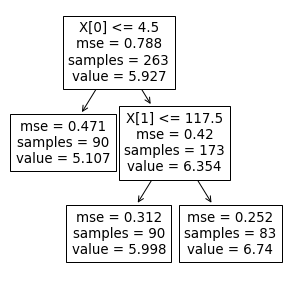

In [8]:
#Metodo plot_tree
plt.figure(figsize=(5,5))
plot_tree(regr);

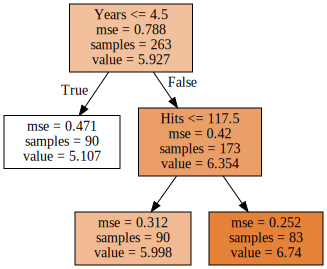

In [7]:
#Método graphviz
# Se visualiza usando la funcion creada al inicio "print_tree"
graph = print_tree(regr, features=['Years', 'Hits'])
graph

Gráfica (manual) de las regiones

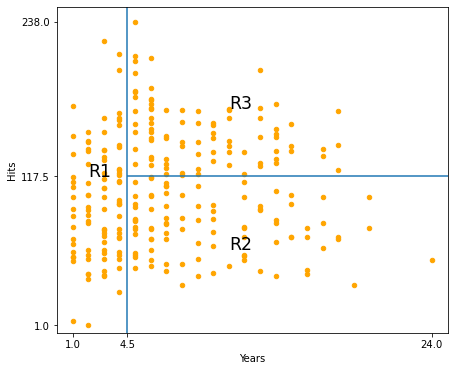

In [8]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25); plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24]), plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250), plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

## Árboles de clasificación

In [9]:
# Importando el dataset heart.csv
df2 = pd.read_csv('data/heart.csv').drop('Unnamed: 0', axis=1).dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [12]:
df2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [10]:
# Se codifican las variables categoricas utilizando
# la funcion "factorize" de Pandas
df2['ChestPain'] = pd.factorize(df2['ChestPain'])[0]
df2['Thal'] = pd.factorize(df2['Thal'])[0]

In [11]:
X2 = df2.drop('AHD', axis=1) # Solo descriptores
y2 = pd.factorize(df2['AHD'])[0] # Variable de salida codificada

Se instancia el objeto (estimador y predictor) y se ajusta

In [12]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2,y2)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

In [13]:
#Acuraccy medio para el conjunto entrenado
clf.score(X2,y2)

0.8215488215488216

Visualización del árbol de clasificación

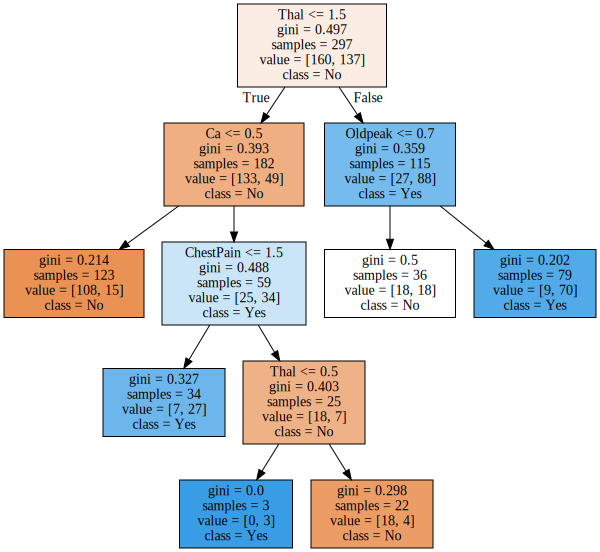

In [14]:
print_tree(clf, features=X2.columns, class_names=['No', 'Yes'])

## Bagging and random forest

### Bagging tree classifier

In [15]:
bag_clf = BaggingClassifier(max_features=3)
bag_clf.fit(X2,y2)
bag_clf.score(X2,y2) # Mean accuracy

0.98989898989899

Ahora se realizará el mismo proceso pero con validación cruzada (tiene mucha mayor validez real)

In [16]:
bag_clf = BaggingClassifier(max_features=3)
cross_val_score(bag_clf, X2,y2, cv=5, verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


0.7742937853107346

El accuracy medio no es tan excelente, pero es mucho más real (cuidado, en principio, se debe separar un Test set al inicio, que no se ha hecho).

### Bagging tree regressor

In [17]:
bag_reg = BaggingRegressor()
bag_reg.fit(X,y)
bag_reg.score(X,y) # R^2

0.9358303592572249

In [18]:
cross_val_score(BaggingRegressor(),X,y,cv=5,verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


0.5635119014447578

¡Qué diferencia! el R^2 no es tan bueno, esto quiere decir que sin hacer validación cruzada hay un sobreajuste grande.

### Random forest classifier

In [19]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X2,y2)
RF_clf.score(X2,y2)

1.0

In [20]:
cross_val_score(RandomForestClassifier(random_state=42),X2,y2,cv=5,verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


0.8146892655367232

### Random forest regressor

In [21]:
RF_reg = RandomForestRegressor(random_state=42)
RF_reg.fit(X,y)
RF_reg.score(X,y)

0.945062528860344

In [22]:
RF_reg.feature_importances_

array([0.58014291, 0.41985709])

In [23]:
model_rf = RandomForestRegressor(random_state=42)
cross_val_score(model_rf,X, y, cv=5, verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


0.5869717136050934

## Boosting
### Gradient boosting classifier

In [24]:
GBC_clf = GradientBoostingClassifier(learning_rate=0.1)
GBC_clf.fit(X2,y2)
GBC_clf.score(X2,y2)

0.9865319865319865

In [25]:
GBC_clf.feature_importances_

array([0.09518238, 0.03760758, 0.17447784, 0.0492966 , 0.05054196,
       0.00397126, 0.00927013, 0.06901082, 0.02893177, 0.08652154,
       0.03550611, 0.19135244, 0.16832958])

In [26]:
cross_val_score(GradientBoostingClassifier(learning_rate=0.1)
, X2,y2, cv=5, verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


0.8043502824858757

Ha mejorado el accuracy

### Gradient boosting regressor

In [27]:
GBR_reg = GradientBoostingRegressor(learning_rate=0.1)
GBR_reg.fit(X,y)
GBR_reg.score(X,y)

0.8711083202015605

In [28]:
GBR_reg = GradientBoostingRegressor(learning_rate=0.1)
cross_val_score(GBR_reg, X, y, cv=10, verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


0.5752709159274236

## Variable importance

In [29]:
# Crea una Series de Panda con el atributo de features_importances_
# y adhiere los nombres de las features como indice
best_features = pd.Series(GBC_clf.feature_importances_, index=df2.drop('AHD', axis=1).columns)
best_features.sort_values(ascending=False) # Ordena los valores de forma descendente

Ca           0.191352
ChestPain    0.174478
Thal         0.168330
Age          0.095182
Oldpeak      0.086522
MaxHR        0.069011
Chol         0.050542
RestBP       0.049297
Sex          0.037608
Slope        0.035506
ExAng        0.028932
RestECG      0.009270
Fbs          0.003971
dtype: float64

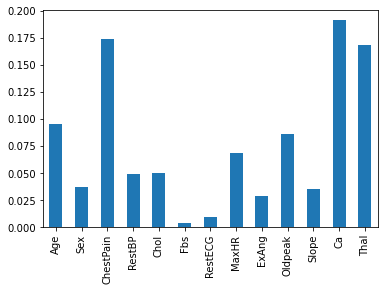

In [30]:
best_features.plot(kind='bar');

## XGBoost
`XGBoost` es una librería que funciona de forma independiente a scikit-learn, pero que se puede integrar fácilmente a su API, mediante los estimadores `XGBClassifier` y `XGBRegressor`. 
A continuación se muestra ejemplos con los dos datasets trabajados anteriormente.

In [39]:
# from xgboost import XGBClassifier

xgb_cl = XGBClassifier(learning_rate=0.1, max_depth=2, eval_metric="mlogloss")

# Validacion cruzada de 5 folds, mide el Accuracy y se ha colocado
# verbose=1 para mostrar informacion sobre el proceso.
cross_val_score(xgb_cl,X2,y2,cv=5,verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


0.8347457627118644

El mejor accuracy! y el tiempo de ejecución es pequeño

In [40]:
xgb_cl.fit(X2,y2)
xgb_cl.score(X2,y2)

0.9158249158249159

In [41]:
best_features = pd.Series(xgb_cl.feature_importances_, index=df2.drop('AHD', axis=1).columns)
best_features.sort_values(ascending=False)

Thal         0.223469
ExAng        0.144824
Ca           0.132362
ChestPain    0.126860
Oldpeak      0.066632
Slope        0.053388
MaxHR        0.050081
Sex          0.041463
Age          0.040626
Chol         0.034040
RestECG      0.033818
Fbs          0.027209
RestBP       0.025228
dtype: float32

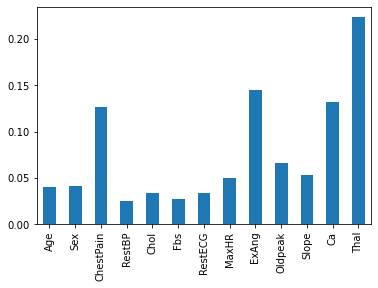

In [42]:
best_features.plot(kind='bar');

## XGBoost: Buscando los mejores hiperparámetros

### Ejemplo de `XGBRegressor` con tuneo de algunos hiperparámetros

In [48]:
# from xgboost import XGBRegressor()
xgb_reg = XGBRegressor()
clf = GridSearchCV( xgb_reg,
                  {'max_depth':[3,6,10], # produndidades de 2 hasta 10 con incrementos de 2
                   'n_estimators': [100,500,1000],
                  'learning_rate': [0.01, 0.05, 0.1]},
                   cv = 5,verbose=1)
clf.fit(X,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [49]:
print(clf.best_score_) # Los mejores hiperparametros
print(clf.best_params_) # r2_score de la validacion cruzada

0.6502860785015445
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


Es el mejor resultado tiene un R^2 de 0.65 obtenidos con árboles con 3 de profundidad máxima, máximo 1000 árboles y una tasa de aprendizaje de 0.05.

### Ejemplo de `XGBClassifier` con tuneo de algunos hiperparámetros
Este ejemplo tiene la mismam configuración del ejemplo con regresión.

In [59]:
xgb_cl = XGBClassifier(eval_metric="mlogloss",nthread=4)
clf = GridSearchCV( xgb_cl,
                  {'max_depth':[3,6,10], # produndidades de 2 hasta 10 con incrementos de 2
                   'n_estimators': [100,500,1000],
                  'learning_rate': [0.01, 0.05, 0.1]},
                   cv = 5,verbose=1,n_jobs=5)
clf.fit(X2,y2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when construct

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when construct

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None

In [60]:
print(clf.best_score_) # Los mejores hiperparametros
print(clf.best_params_) # r2_score de la validacion cruzada

0.8180225988700565
{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}


In [54]:
best_features = pd.Series(clf.best_estimator_.feature_importances_, index=df2.drop('AHD', axis=1).columns)
best_features.sort_values(ascending=False)

Thal         0.296502
Ca           0.267454
ChestPain    0.078022
Sex          0.068817
Oldpeak      0.061037
Slope        0.054013
RestBP       0.038547
MaxHR        0.032159
ExAng        0.029952
Age          0.028740
RestECG      0.024840
Chol         0.019916
Fbs          0.000000
dtype: float32

In [ ]:
# Una configuracion mas variada para GridSearch:
# param_grid = {
#         'silent': [False],
#         'max_depth': [6, 10, 15, 20],
#         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
#         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#         'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#         'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#         'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
#         'gamma': [0, 0.25, 0.5, 1.0],
#         'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
#         'n_estimators': [25,50,75,100,125,150]}


### Ahora un ejemplo usando `RandomizedSearchCV`
Esta clase permite hacer una búsqueda aleatoria de un número determinado de combinaciones aleatorias para unos parámetros definidos ya sean por una lista de valores o una distribución específica.

In [57]:
# from sklearn.modecl_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

xgb_cl = XGBClassifier(eval_metric="mlogloss",nthread=4)
param_grid = {"max_depth": randint(2,5),
              "learning_rate": uniform(0.001,0.4), 
              "n_estimators": randint(25,200)}

# Se probaran 200 combinaciones de los parametros definidos en param_dist
# en cada validacion cruzada, es decir, 1000 iteraciones
clf = RandomizedSearchCV(xgb_cl, param_grid, n_iter=400, cv=5, n_jobs=5,verbose=1, random_state=42)

clf.fit(X2,y2)


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when construct

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when construct

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/home/santi/miniconda3/envs/AAD/lib/python3.

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=400, n_jobs=5,
           

In [56]:
print(clf.best_score_) # Los mejores hiperparametros
print(clf.best_params_) # accuracy medio de la validacion cruzada

0.8415254237288134
{'learning_rate': 0.34359593647532893, 'max_depth': 2, 'n_estimators': 28}


**El mejor accuracy en validación cruzada!**

In [58]:
best_features = pd.Series(clf.best_estimator_.feature_importances_, index=df2.drop('AHD', axis=1).columns)
best_features.sort_values(ascending=False)

Thal         0.203137
ExAng        0.183749
ChestPain    0.138253
Ca           0.121477
Oldpeak      0.056664
Slope        0.053608
Age          0.046967
Sex          0.040925
MaxHR        0.038946
Fbs          0.033615
Chol         0.030043
RestBP       0.029012
RestECG      0.023602
dtype: float32